In [1]:
from fastai.vision.all import *
import fastai
path = untar_data(URLs.PETS)

In [2]:
torch.backends.mps.is_built()

False

In [3]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(seed=42),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                item_tfms = Resize(460),
                batch_tfms = aug_transforms(size = 224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

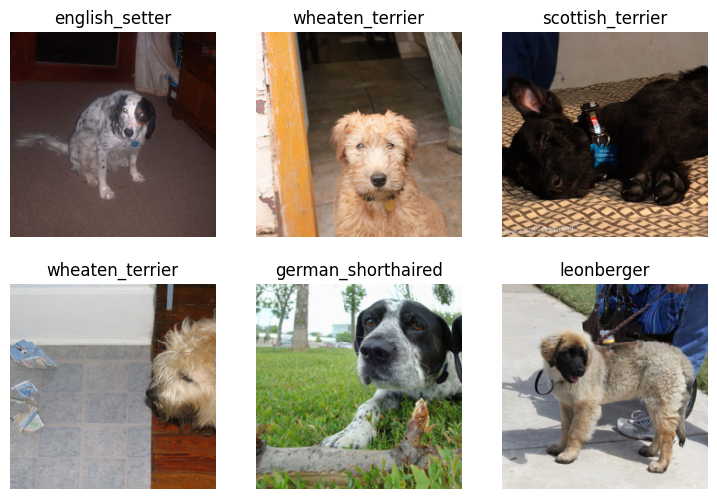

In [4]:
dls.show_batch(nrows=2, ncols=3)

In [5]:
learn = vision_learner(dls, resnet34, metrics= error_rate)
print(learn.dls.device)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s]


cuda:0


In [6]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.516702,0.348784,0.107578,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.499232,0.294704,0.089986,00:41
1,0.315372,0.236870,0.069689,00:42


In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(1, base_lr =0.1)

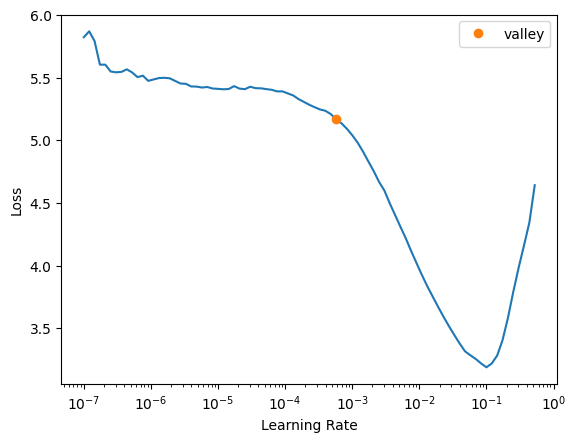

In [8]:
lr_valley = learn.lr_find()

In [9]:
lr_valley.valley

0.0005754399462603033

In [10]:
learn.fine_tune(2, base_lr=8.31e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.173496,0.420723,0.135318,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.600889,0.250760,0.081867,00:41
1,0.408235,0.230915,0.073748,00:41


In [11]:
learn.fine_tune??

In [12]:
learn.freeze_to??

In [13]:
learn.opt??

epoch,train_loss,valid_loss,error_rate,time
0,2.190303,0.416264,0.120433,00:35
1,0.838602,0.289637,0.089986,00:35
2,0.538671,0.268475,0.082544,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.466499,0.264122,0.079838,00:41
1,0.458107,0.245480,0.078484,00:41
2,0.423738,0.228417,0.075778,00:42
3,0.362083,0.215646,0.073748,00:41
4,0.317324,0.210559,0.068336,00:41
5,0.294961,0.203729,0.064953,00:41
6,0.246430,0.198500,0.068336,00:42
7,0.238257,0.197807,0.065629,00:41
8,0.228861,0.195213,0.067659,00:41
9,0.208461,0.190760,0.062246,00:42


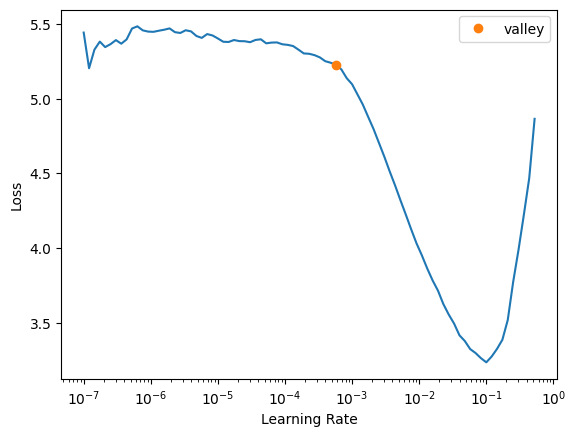

In [14]:
learn = vision_learner(dls, resnet34, metrics= error_rate)
lr = learn.lr_find()
learn.fit_one_cycle(3, lr_max = lr.valley)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

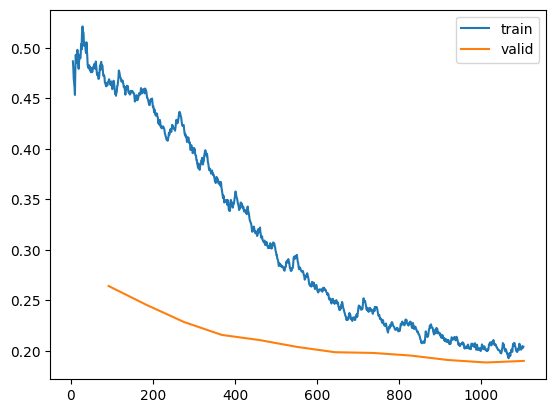

In [15]:
learn.recorder.plot_loss()

In [16]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics = error_rate).to_fp16()
learn.fine_tune(6,freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 164MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.200570,0.483767,0.154263,00:35
1,0.860685,0.310651,0.098782,00:34
2,0.559325,0.292962,0.090663,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.292555,0.233096,0.081867,00:38
1,0.240701,0.244791,0.078484,00:39
2,0.185530,0.237943,0.073072,00:39
3,0.129739,0.211581,0.069689,00:39
4,0.086112,0.204647,0.066982,00:39
5,0.061570,0.197180,0.065629,00:39
